# Logistic Regression - *(from scratch)*

In [15]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import math
from scipy.special import expit
from scipy import optimize

### What is Logistic fn?
*The logistic function, also called the sigmoid function*

*1 / (1 + e^(-value))*
* *It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.*



*Below is a plot of the numbers between -5 and 5 transformed into the range 0 and 1 using the logistic function.*

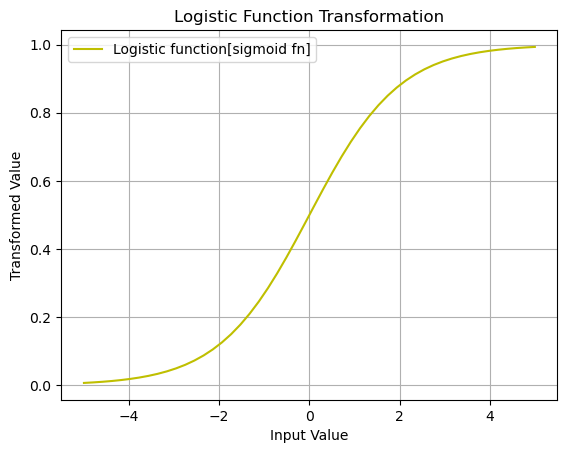

In [40]:
def logistic_fn(value):
    return 1 / (1 + math.e**(-value))

x_val = np.linspace(-5 , 5)
y_val = [logistic_fn(x) for x in x_val]


plt.plot(x_val , y_val ,'y-', label = "Logistic function[sigmoid fn]")
plt.xlabel('Input Value')
plt.ylabel('Transformed Value')
plt.title('Logistic Function Transformation')
plt.grid(True)
plt.legend()
plt.show()



*Alternative*

In [38]:
# from scipy.special import expit
# myx = np.arange(-5,5,.1)
# plt.plot(myx,expit(myx),'y-')
# plt.title("sigmoid function")
# plt.grid(True)

# *Representation Used for Logistic Regression*
* *Logistic regression uses an equation as the representation, very much like linear regression.*

* *Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary value (0 or 1) rather than a numeric value.*

*Logistic regression equation:* 

*y = e^(b0 + b1 * x) / (1 + e^(b0 + b1 * x))*

# *1. Logistic Regression*

In [2]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex2/data/ex2data1.txt'
cols = np.loadtxt(df , delimiter=','  ,usecols= (0,1,2) , unpack = True)
##Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m  =X.shape[0]
X = np.insert(X,0,1,axis= 1)
# print(y.shape)
# print(X)


# *1.1 Visualing the data*

In [3]:
pos = np.array([X[i] for i in range(X.shape[0]) if y[i] == 1])
neg = np.array([X[i] for i in range(X.shape[0]) if y[i] == 0])

# print(neg)


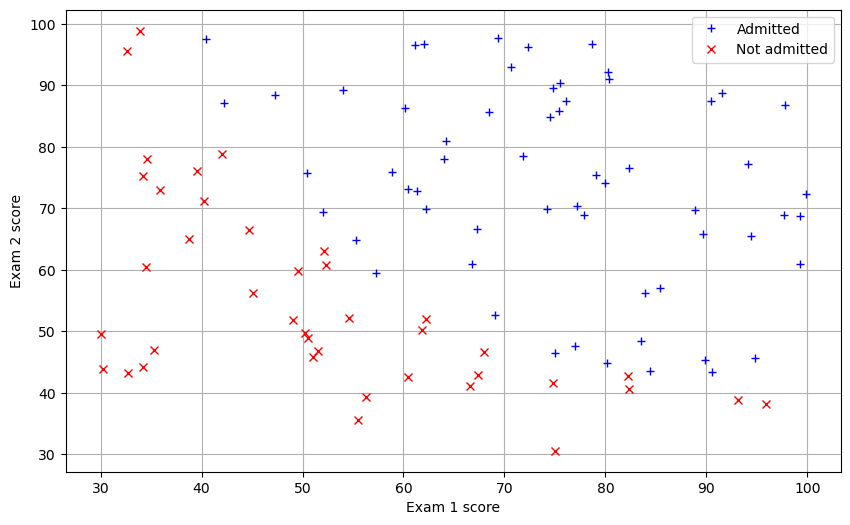

In [4]:
def plotData():
    plt.figure(figsize=(10,6))
    plt.plot(pos[:,1],pos[:,2],'b+',label='Admitted')
    plt.plot(neg[:,1],neg[:,2],'rx',label='Not admitted')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend()
    plt.grid(True)
    
plotData()

# *Implementation*

### *Hypothesis function and cost function for logistic regression*

In [4]:
def h(mytheta,myX): #Logistic hypothesis function
    return expit(np.dot(myX,mytheta)) 

def computeCost(mytheta  ,myX , myy , mylambda = 0.):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    Note this includes regularization, if you set mylambda to nonzero
    For the initial stage, the default 0. is used for mylambda
    """
    sec1 = np.dot(-np.array(myy).T,np.log(h(mytheta,myX)))
    sec2 = np.dot((1-np.array(myy)).T,np.log(1-h(mytheta,myX)))
    regterm = (mylambda/2) * np.sum(np.dot(mytheta[1:].T,mytheta[1:])) #Skip theta0
    return float( (1/m) * (np.sum(sec1 - sec2) + regterm) )

In [6]:
#Check that with theta as zeros, cost returns about 0.693:
initial_theta = np.zeros((X.shape[1],1))

# print(initial_theta.shape)
computeCost(initial_theta,X,y)

0.6931471805599452

# *Using In-built function to optimize out theta to get min cost*

In [7]:

from scipy import optimize

def optimizeTheta(mytheta,myX,myy,mylambda=0.):
    result = optimize.fmin(computeCost, x0=mytheta, args=(myX, myy, mylambda), maxiter=400, full_output=True)
    return result[0], result[1]

In [8]:
theta, mincost = optimizeTheta(initial_theta,X,y)
print("theta: " , theta ,"\ncost: " ,mincost)

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
theta:  [-25.16130062   0.20623142   0.20147143] 
cost:  0.2034977015902151


In [9]:
print (computeCost(theta,X,y)) #"Calling costFunction function using the optimal parameters of theta.

0.2034977015902151


### *Boundary value calculation*

The decision boundary for a linear classifier is the set of points where the classifier is equally likely to assign either of two classes. In the context of logistic regression or linear classifiers, the hypothesis function (h(x)) outputs a probability that a given input x belongs to the positive class.

For logistic regression, the hypothesis function is:

h(x) = sigmoid_fn(theta.X) or *(1 / 1 + e^-(θ0 + θ1x1 + θ2x2))*

The decision boundary is where the classifier is equally confident about the two classes, which corresponds to a probability of 0.5. At this probability, the decision function is zero: *h(x) = 0.5*

For the logistic function, this occurs when the exponent in the denominator is zero:
*θ0 + θ1x1 + θ2x2 = 0*

This decision boundary separates the feature space into two regions:
* θ0 + θ1x1 + θ2x2 > 0 where h(x) > 0.5 (typically classifying the input as the positive class).
* θ0 + θ1x1 + θ2x2 < 0 where h(x) < 0.5 (typically classifying the input as the negative class).

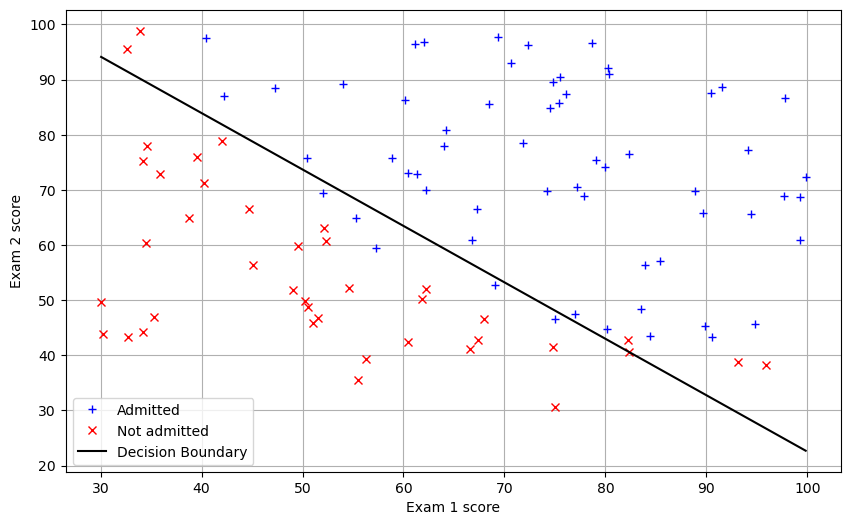

In [10]:
#Plotting the decision boundary: two points, draw a line between
#Decision boundary occurs when h = 0, or when
#theta0 + theta1*x1 + theta2*x2 = 0
#y=mx+b is replaced by x2 = (-1/thetheta2)(theta0 + theta1*x1)

xs_boundary = np.array([np.min(X[:,1]) , np.max(X[:,1])])
# print(xs_boundary)
ys_boundary = (-1/theta[2])*(theta[0] + theta[1] * xs_boundary)

# plotting
plotData()
plt.plot(xs_boundary , ys_boundary , 'k-' , label = "Decision Boundary")
plt.legend()

In [11]:
#For a student with an Exam 1 score of 45 and an Exam 2 score of 85, 
#you should expect to see an admission probability of 0.776.
print(h(theta , [1.,45.,85.]))

0.7762915904112411


Testing Accuracy

In [12]:
def makePrediction(theta , myx):
    return h(theta , myx) >= 0.5
pos_val = float(np.sum(makePrediction(theta , pos)))
neg_val = float(np.sum(np.invert(makePrediction(theta  ,neg))))

total = len(pos) + len(neg)

prediction = float(pos_val + neg_val) / total

print("Fraction of training sample prdicted correct:" , prediction)

# float(np.invert(makePrediction(theta , np.array([1.,80.,90.]))))

Fraction of training sample prdicted correct: 0.89


# *2. Regularized Logistic Regression*

### *2.1 Visualising data*

In [5]:
df = '/home/balerion/Desktop/leetcode_Ai/Ai/Andrew-NG-Notes/Machine Learning notebooks By Andrew NG/ex2/data/ex2data2.txt'
cols = np.loadtxt(df , delimiter=',' , usecols=(0,1,2) , unpack=True)

X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m  = X.shape[0]
X = np.insert(X,0,1,axis = 1)

pos_list = [X[i] for i in range(X.shape[0]) if y[i] == 1]
neg_list = [X[i] for i in range(X.shape[0]) if y[i] == 0]

pos = np.array(pos_list)
neg = np.array(neg_list)




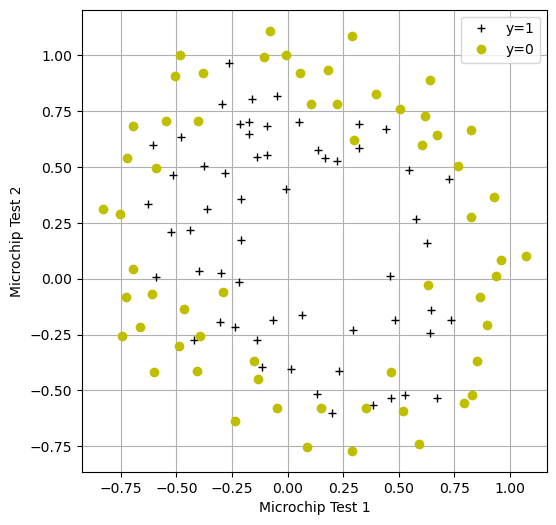

In [6]:
def plotData():
    plt.plot(pos[:,1],pos[:,2],'k+',label='y=1')
    plt.plot(neg[:,1],neg[:,2],'yo',label='y=0')
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend()
    plt.grid(True)
    
plt.figure(figsize=(6,6))
plotData()

### *2.2 Feature mapping*

*The primary goal of feature mapping is to enable the logistic regression model to capture non-linear relationships between the features and the target variable. While logistic regression is inherently a linear model, transforming the features allows it to fit more complex patterns.*



In [7]:
def mapFeature( x1col, x2col ):
    """ 
    Function that takes in a column of n- x1's, a column of n- x2s, and builds
    a n- x 28-dim matrix of featuers as described in the homework assignment
    """
    degrees = 6
    out = np.ones( (x1col.shape[0], 1) )

    for i in range(1, degrees+1):
        for j in range(0, i+1):
            term1 = x1col ** (i-j)
            term2 = x2col ** (j)
            term  = (term1 * term2).reshape( term1.shape[0], 1 ) 
            out   = np.hstack(( out, term ))
    return out
    

In [8]:
mappedX = mapFeature(X[:,1],X[:,2])
# print(mappedX)
# print(mappedX.shape[0] , mappedX.shape[1])

# mappedX.shape[1]

### *2.3 Cost func and Gradient*

In [9]:
initial_theta = np.zeros((mappedX.shape[1] , 1))

computeCost(initial_theta,mappedX,y)

0.6931471805599453

*2.3.1 Optimization using fminunc*

BFGS Algorithm: The BFGS method specifically updates the approximation of the Hessian matrix using gradient evaluations at each iteration. This makes it more efficient than the classic Newton's method, especially for high-dimensional problems.

In [24]:
def optimizeRegularizedTheta(mytheta,myX,myy,mylambda=0.):
    mytheta = np.asarray(mytheta).flatten()
    result = optimize.minimize(computeCost, mytheta, args=(myX, myy, mylambda),  method='BFGS', options={"maxiter":500, "disp":False} )
    return np.array([result.x]), result.fun
    
theta, mincost = optimizeRegularizedTheta(initial_theta,mappedX,y)

*Initially we we're getting error message ValueError: 'x0' must only have one dimension. indicates that the initial_theta argument passed to the optimize.minimize function is not a one-dimensional array, which is required.*

*Troubleshoot:* 

* *mytheta = np.asarray(mytheta).flatten()*

In [12]:
# print("theta: " , theta ,"\ncost: " ,mincost)

### *2.4 Plotting decision boundary*

In [17]:
def plotBoundary(mytheta, myX, myy, mylambda=0.):
    theta, mincost = optimizeRegularizedTheta(mytheta,myX,myy,mylambda)
    xvals = np.linspace(-1,1.5,50)
    yvals = np.linspace(-1,1.5,50)
    zvals = np.zeros((len(xvals),len(yvals)))
    for i in range(len(xvals)):
        for j in range(len(yvals)):
            myfeaturesij = mapFeature(np.array([xvals[i]]),np.array([yvals[j]]))
            zvals[i][j] = np.dot(theta,myfeaturesij.T) # calculating hypothesis (theta^T.X) for boundary it should be zero
    zvals = zvals.transpose()
    # print(zvals)
    
    u, v = np.meshgrid( xvals, yvals ) # converting xvals and yvals into co-ordinates
    # (np.meshgrid returns arrays in which u corresponds to columns (x-values) and v corresponds to rows (y-values))
    mycontour = plt.contour(xvals , yvals , zvals ,[0])
    myfmt = { 0:'Lambda = %d'%mylambda}
    plt.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    plt.title("Decision Boundary")


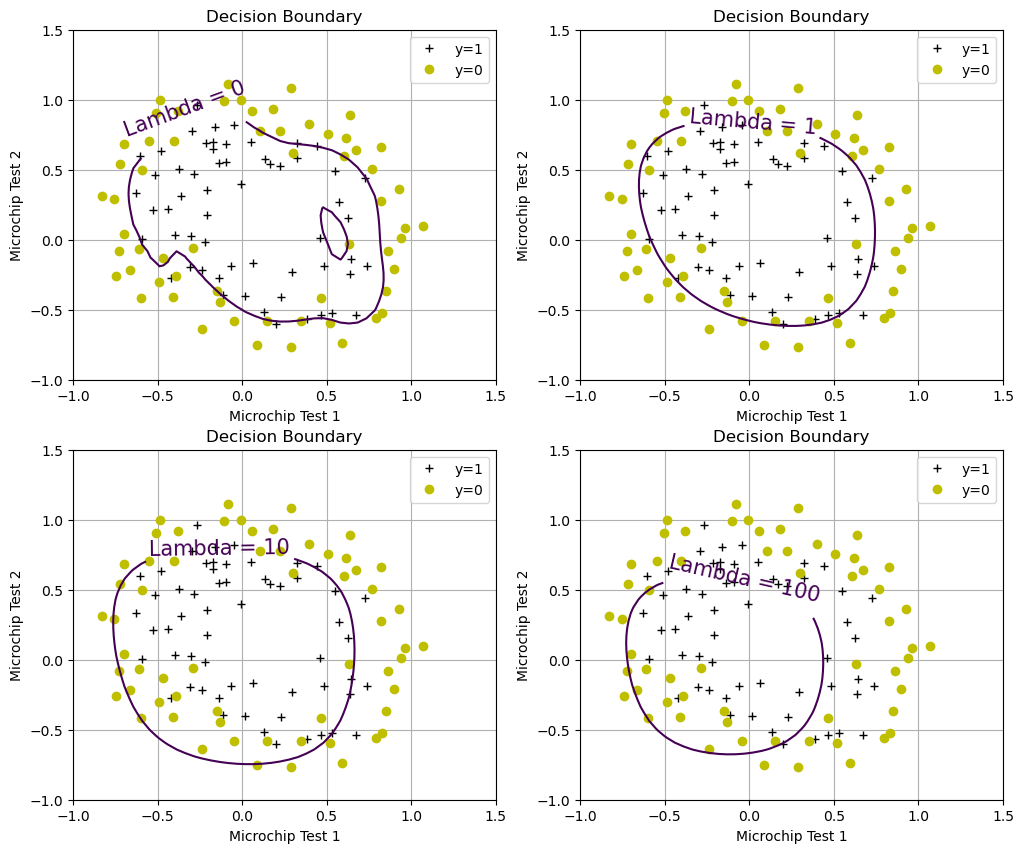

In [22]:
# plotBoundary(theta , mappedX , y  ,0)
plt.figure(figsize=(12,10))
plt.subplot(221)
plotData()
plotBoundary(initial_theta,mappedX,y,0.) # we can use theta as well instead of initial_theta

plt.subplot(222)
plotData()
plotBoundary(initial_theta,mappedX,y,1.)

plt.subplot(223)
plotData()
plotBoundary(initial_theta,mappedX,y,10.)

plt.subplot(224)
plotData()
plotBoundary(initial_theta,mappedX,y,100.)

